In [51]:
from openpyxl import load_workbook
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv ('Survei_Medsos.csv')
df

,Jenis_Kelamin,Pekerjaan,Sering,Lupa_Waktu,Waktu_Sekali_Pakai,Waktu_Harian,Mengganggu_Produktivitas,Membuang_Waktu,Tidak_Bisa_Kontrol_Diri,Tidak_Sadar_Waktu,Fomo,Tanpa_Tujuan,Terpikirkan,Usaha_Melepaskan_Diri,Kesulitan_Melepaskan_Diri,Butuh_Aplikasi,Pernah_Memakai_Aplikasi_Pengaturan_Waktu
0,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,31-60 menit,> 2 jam,4,5,5,5,5,5,5,Pernah,Ya,Ya,Ya
1,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,5-10 menit,31-60 menit,3,3,3,3,4,2,3,Pernah,Ya,Ya,Tidak
2,Perempuan,Pelajar/Mahasiswa,WA,WA,< 5 menit,> 3 jam,3,4,4,4,3,2,3,Pernah,Ya,Ya,Tidak
3,Perempuan,Ibu Rumah Tangga,Instagram,Instagram,11-30 menit,> 3 jam,4,5,3,3,2,3,2,Pernah,Ya,Tidak,Tidak
4,Laki-laki,Pelajar/Mahasiswa,WA,Instagram,31-60 menit,> 2 jam,4,5,4,4,2,3,2,Pernah,Ya,Ya,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Laki-laki,Pelajar/Mahasiswa,Twitter,Twitter,11-30 menit,> 1 jam,5,4,4,3,5,4,4,Pernah,Ya,Ya,Ya
114,Laki-laki,Pelajar/Mahasiswa,LINE,LINE,> 1 jam,> 3 jam,3,4,4,4,5,3,4,Pernah,Ya,Ya,Tidak
115,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,31-60 menit,> 2 jam,5,5,5,5,4,4,3,Pernah,Ya,Ya,Ya
116,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,11-30 menit,> 1 jam,4,4,3,3,2,2,3,Pernah,Ya,Tidak,Tidak


In [53]:
file_path = 'Survei_Medsos.csv'

In [54]:
data_medsos = pd.read_csv(file_path)

In [55]:
print(data_medsos.head())

  Jenis_Kelamin          Pekerjaan     Sering Lupa_Waktu Waktu_Sekali_Pakai  \
0     Laki-laki  Pelajar/Mahasiswa  Instagram  Instagram        31-60 menit   
1     Laki-laki  Pelajar/Mahasiswa  Instagram  Instagram         5-10 menit   
2     Perempuan  Pelajar/Mahasiswa         WA         WA          < 5 menit   
3     Perempuan   Ibu Rumah Tangga  Instagram  Instagram        11-30 menit   
4     Laki-laki  Pelajar/Mahasiswa         WA  Instagram        31-60 menit   

  Waktu_Harian  Mengganggu_Produktivitas  Membuang_Waktu  \
0      > 2 jam                         4               5   
1  31-60 menit                         3               3   
2      > 3 jam                         3               4   
3      > 3 jam                         4               5   
4      > 2 jam                         4               5   

   Tidak_Bisa_Kontrol_Diri  Tidak_Sadar_Waktu  Fomo  Tanpa_Tujuan  \
0                        5                  5     5             5   
1                        3

In [56]:
df.isna().sum()

Jenis_Kelamin                               0
Pekerjaan                                   0
Sering                                      0
Lupa_Waktu                                  0
Waktu_Sekali_Pakai                          0
Waktu_Harian                                0
Mengganggu_Produktivitas                    0
Membuang_Waktu                              0
Tidak_Bisa_Kontrol_Diri                     0
Tidak_Sadar_Waktu                           0
Fomo                                        0
Tanpa_Tujuan                                0
Terpikirkan                                 0
Usaha_Melepaskan_Diri                       0
Kesulitan_Melepaskan_Diri                   1
Butuh_Aplikasi                              0
Pernah_Memakai_Aplikasi_Pengaturan_Waktu    0
dtype: int64

In [57]:
data_medsos. isna().sum()

Jenis_Kelamin                               0
Pekerjaan                                   0
Sering                                      0
Lupa_Waktu                                  0
Waktu_Sekali_Pakai                          0
Waktu_Harian                                0
Mengganggu_Produktivitas                    0
Membuang_Waktu                              0
Tidak_Bisa_Kontrol_Diri                     0
Tidak_Sadar_Waktu                           0
Fomo                                        0
Tanpa_Tujuan                                0
Terpikirkan                                 0
Usaha_Melepaskan_Diri                       0
Kesulitan_Melepaskan_Diri                   1
Butuh_Aplikasi                              0
Pernah_Memakai_Aplikasi_Pengaturan_Waktu    0
dtype: int64

In [58]:
def_Kesulitan_Melepaskan_Diri = "Ya"
data_medsos.Kesulitan_Melepaskan_Diri .fillna(def_Kesulitan_Melepaskan_Diri , inplace =True)

In [59]:
data_medsos. isna().sum()

Jenis_Kelamin                               0
Pekerjaan                                   0
Sering                                      0
Lupa_Waktu                                  0
Waktu_Sekali_Pakai                          0
Waktu_Harian                                0
Mengganggu_Produktivitas                    0
Membuang_Waktu                              0
Tidak_Bisa_Kontrol_Diri                     0
Tidak_Sadar_Waktu                           0
Fomo                                        0
Tanpa_Tujuan                                0
Terpikirkan                                 0
Usaha_Melepaskan_Diri                       0
Kesulitan_Melepaskan_Diri                   0
Butuh_Aplikasi                              0
Pernah_Memakai_Aplikasi_Pengaturan_Waktu    0
dtype: int64

In [60]:
data_medsos.loc[:,['Jenis_Kelamin','Pekerjaan','Sering','Lupa_Waktu','Waktu_Sekali_Pakai','Waktu_Harian','Mengganggu_Produktivitas','Membuang_Waktu','Tidak_Bisa_Kontrol_Diri','Tidak_Sadar_Waktu','Fomo','Tanpa_Tujuan','Terpikirkan','Usaha_Melepaskan_Diri','Kesulitan_Melepaskan_Diri','Butuh_Aplikasi','Pernah_Memakai_Aplikasi_Pengaturan_Waktu',]]

,Jenis_Kelamin,Pekerjaan,Sering,Lupa_Waktu,Waktu_Sekali_Pakai,Waktu_Harian,Mengganggu_Produktivitas,Membuang_Waktu,Tidak_Bisa_Kontrol_Diri,Tidak_Sadar_Waktu,Fomo,Tanpa_Tujuan,Terpikirkan,Usaha_Melepaskan_Diri,Kesulitan_Melepaskan_Diri,Butuh_Aplikasi,Pernah_Memakai_Aplikasi_Pengaturan_Waktu
0,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,31-60 menit,> 2 jam,4,5,5,5,5,5,5,Pernah,Ya,Ya,Ya
1,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,5-10 menit,31-60 menit,3,3,3,3,4,2,3,Pernah,Ya,Ya,Tidak
2,Perempuan,Pelajar/Mahasiswa,WA,WA,< 5 menit,> 3 jam,3,4,4,4,3,2,3,Pernah,Ya,Ya,Tidak
3,Perempuan,Ibu Rumah Tangga,Instagram,Instagram,11-30 menit,> 3 jam,4,5,3,3,2,3,2,Pernah,Ya,Tidak,Tidak
4,Laki-laki,Pelajar/Mahasiswa,WA,Instagram,31-60 menit,> 2 jam,4,5,4,4,2,3,2,Pernah,Ya,Ya,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Laki-laki,Pelajar/Mahasiswa,Twitter,Twitter,11-30 menit,> 1 jam,5,4,4,3,5,4,4,Pernah,Ya,Ya,Ya
114,Laki-laki,Pelajar/Mahasiswa,LINE,LINE,> 1 jam,> 3 jam,3,4,4,4,5,3,4,Pernah,Ya,Ya,Tidak
115,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,31-60 menit,> 2 jam,5,5,5,5,4,4,3,Pernah,Ya,Ya,Ya
116,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,11-30 menit,> 1 jam,4,4,3,3,2,2,3,Pernah,Ya,Tidak,Tidak


In [61]:
for index, row in data_medsos.iterrows():
  if row['Mengganggu_Produktivitas'] >4:
    data_medsos.loc[index, 'Keterangan'] = 'Maksimum'
  elif row['Mengganggu_Produktivitas'] >=2:
    data_medsos.loc[index, 'Keterangan'] = 'Rata-Rata'
  else :
    data_medsos.loc[index, 'Keterangan'] = 'Minimum'

data_medsos[['Jenis_Kelamin','Pekerjaan','Sering','Lupa_Waktu','Waktu_Sekali_Pakai','Waktu_Harian','Mengganggu_Produktivitas','Membuang_Waktu','Tidak_Bisa_Kontrol_Diri','Tidak_Sadar_Waktu','Fomo','Tanpa_Tujuan','Terpikirkan','Usaha_Melepaskan_Diri','Kesulitan_Melepaskan_Diri','Butuh_Aplikasi','Pernah_Memakai_Aplikasi_Pengaturan_Waktu']]

,Jenis_Kelamin,Pekerjaan,Sering,Lupa_Waktu,Waktu_Sekali_Pakai,Waktu_Harian,Mengganggu_Produktivitas,Membuang_Waktu,Tidak_Bisa_Kontrol_Diri,Tidak_Sadar_Waktu,Fomo,Tanpa_Tujuan,Terpikirkan,Usaha_Melepaskan_Diri,Kesulitan_Melepaskan_Diri,Butuh_Aplikasi,Pernah_Memakai_Aplikasi_Pengaturan_Waktu
0,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,31-60 menit,> 2 jam,4,5,5,5,5,5,5,Pernah,Ya,Ya,Ya
1,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,5-10 menit,31-60 menit,3,3,3,3,4,2,3,Pernah,Ya,Ya,Tidak
2,Perempuan,Pelajar/Mahasiswa,WA,WA,< 5 menit,> 3 jam,3,4,4,4,3,2,3,Pernah,Ya,Ya,Tidak
3,Perempuan,Ibu Rumah Tangga,Instagram,Instagram,11-30 menit,> 3 jam,4,5,3,3,2,3,2,Pernah,Ya,Tidak,Tidak
4,Laki-laki,Pelajar/Mahasiswa,WA,Instagram,31-60 menit,> 2 jam,4,5,4,4,2,3,2,Pernah,Ya,Ya,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Laki-laki,Pelajar/Mahasiswa,Twitter,Twitter,11-30 menit,> 1 jam,5,4,4,3,5,4,4,Pernah,Ya,Ya,Ya
114,Laki-laki,Pelajar/Mahasiswa,LINE,LINE,> 1 jam,> 3 jam,3,4,4,4,5,3,4,Pernah,Ya,Ya,Tidak
115,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,31-60 menit,> 2 jam,5,5,5,5,4,4,3,Pernah,Ya,Ya,Ya
116,Laki-laki,Pelajar/Mahasiswa,Instagram,Instagram,11-30 menit,> 1 jam,4,4,3,3,2,2,3,Pernah,Ya,Tidak,Tidak


In [62]:
tabel = data_medsos['Waktu_Harian'].astype(str).tolist()

In [63]:
print(tabel[:5])

['> 2 jam', '31-60 menit', '> 3 jam', '> 3 jam', '> 2 jam']


In [64]:
CV = CountVectorizer(stop_words=None)


In [65]:
term_fit = CV.fit(tabel)

In [66]:
print(len(term_fit.vocabulary_))


5


In [67]:
print (term_fit.vocabulary_)

{'jam': 3, '31': 1, '60': 2, 'menit': 4, '30': 0}


In [68]:
term_frekuency = term_fit.transform(data_medsos)
print (data_medsos)

    Jenis_Kelamin          Pekerjaan     Sering Lupa_Waktu Waktu_Sekali_Pakai  \
0       Laki-laki  Pelajar/Mahasiswa  Instagram  Instagram        31-60 menit   
1       Laki-laki  Pelajar/Mahasiswa  Instagram  Instagram         5-10 menit   
2       Perempuan  Pelajar/Mahasiswa         WA         WA          < 5 menit   
3       Perempuan   Ibu Rumah Tangga  Instagram  Instagram        11-30 menit   
4       Laki-laki  Pelajar/Mahasiswa         WA  Instagram        31-60 menit   
..            ...                ...        ...        ...                ...   
113     Laki-laki  Pelajar/Mahasiswa    Twitter    Twitter        11-30 menit   
114     Laki-laki  Pelajar/Mahasiswa       LINE       LINE            > 1 jam   
115     Laki-laki  Pelajar/Mahasiswa  Instagram  Instagram        31-60 menit   
116     Laki-laki  Pelajar/Mahasiswa  Instagram  Instagram        11-30 menit   
117     Perempuan  Pelajar/Mahasiswa         WA  Instagram        11-30 menit   

    Waktu_Harian  Menggangg

In [69]:
term = term_fit.transform(tabel)
tfidf_transform = TfidfTransformer().fit(term)
tfidf = tfidf_transform.transform(term_frekuency)
print (tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-70-fcd33b9e0bb8>:5: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(tfidf)
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:545: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var


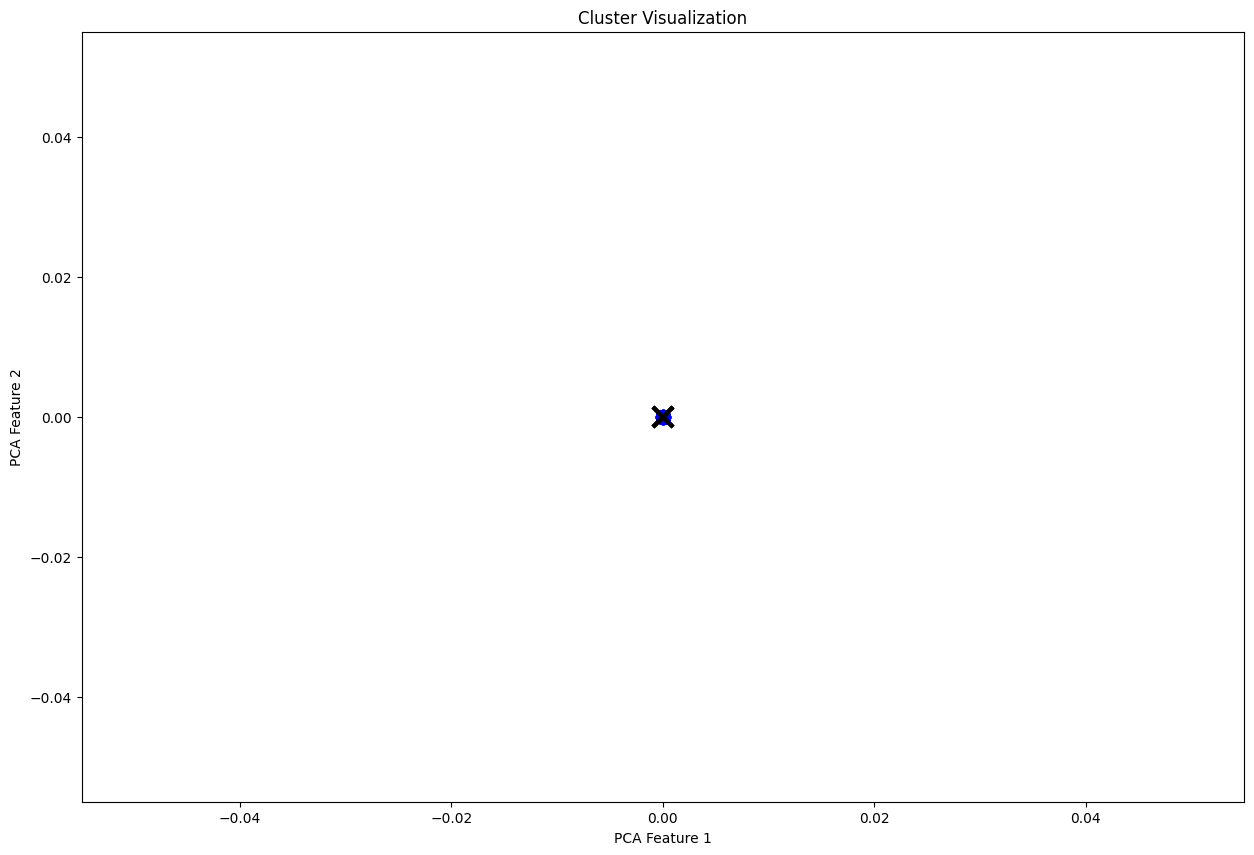

In [70]:

# Inisialisasi KMeans
kmeans = KMeans(n_clusters=3)

# Melakukan clustering pada data yang telah di-transformasi dengan TF-IDF
kmeans.fit(tfidf)

# Mendapatkan pusat cluster dan label dari setiap data
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Melakukan reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
tfidf_2d = pca.fit_transform(tfidf.toarray())

# Visualisasi menggunakan matplotlib
plt.figure(figsize=(15,10))
colors = ['b', 'g', 'r']

for i in range(len(tfidf_2d)):
    plt.plot(tfidf_2d[i][0], tfidf_2d[i][1], colors[labels[i]] + 'o', markersize=10)

for i in range(len(centroids)):
    centroid_2d = pca.transform([centroids[i]])
    plt.plot(centroid_2d[0][0], centroid_2d[0][1], 'kx', markersize=15, markeredgewidth=3)

plt.title('Cluster Visualization')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()


In [71]:
y = data_medsos['Membuang_Waktu'].apply(float).values
print("Values from 'Membuang_Waktu':\n", y)

Values from 'Membuang_Waktu':
 [5. 3. 4. 5. 5. 2. 5. 4. 4. 4. 3. 3. 3. 5. 4. 4. 3. 2. 4. 2. 4. 5. 5. 3.
 3. 4. 4. 3. 1. 4. 4. 2. 3. 4. 4. 4. 3. 4. 4. 3. 5. 4. 5. 3. 2. 2. 4. 2.
 4. 3. 2. 3. 1. 3. 4. 4. 4. 4. 5. 3. 4. 4. 1. 5. 4. 1. 4. 4. 5. 2. 3. 5.
 4. 3. 5. 5. 5. 5. 5. 3. 3. 2. 3. 5. 4. 2. 4. 4. 4. 4. 3. 3. 4. 4. 3. 4.
 1. 4. 3. 4. 1. 3. 4. 3. 1. 2. 3. 2. 3. 3. 4. 4. 5. 4. 4. 5. 4. 3.]


In [72]:
mengganggu_produktivitas = data_medsos['Mengganggu_Produktivitas'].apply(float).values
print("Values from 'Mengganggu_Produktivitas':\n", mengganggu_produktivitas)

Values from 'Mengganggu_Produktivitas':
 [4. 3. 3. 4. 4. 2. 4. 4. 4. 4. 4. 4. 3. 5. 3. 4. 1. 3. 4. 3. 3. 4. 5. 5.
 2. 4. 4. 4. 1. 4. 5. 2. 2. 4. 4. 2. 3. 3. 3. 4. 5. 4. 5. 4. 2. 3. 3. 3.
 4. 3. 3. 3. 4. 4. 2. 4. 4. 4. 5. 2. 3. 4. 3. 4. 4. 1. 4. 3. 4. 2. 4. 5.
 4. 3. 5. 5. 4. 5. 3. 3. 3. 3. 3. 1. 4. 2. 3. 3. 4. 3. 4. 3. 4. 3. 3. 3.
 4. 4. 3. 4. 1. 3. 3. 3. 2. 3. 4. 2. 3. 4. 4. 4. 5. 5. 3. 5. 4. 4.]


In [73]:
features = data_medsos[['Membuang_Waktu', 'Mengganggu_Produktivitas']].apply(pd.to_numeric, errors='coerce')

In [74]:
# Mengatasi missing values jika ada
features = features.dropna().values

In [75]:
# Standardisasi fitur
scaler = StandardScaler().fit(features)
X = scaler.transform(features)
print("Standardized features:\n", X)

Standardized features:
 [[ 1.36415184  0.55848889]
 [-0.47550436 -0.471225  ]
 [ 0.44432374 -0.471225  ]
 [ 1.36415184  0.55848889]
 [ 1.36415184  0.55848889]
 [-1.39533246 -1.50093889]
 [ 1.36415184  0.55848889]
 [ 0.44432374  0.55848889]
 [ 0.44432374  0.55848889]
 [ 0.44432374  0.55848889]
 [-0.47550436  0.55848889]
 [-0.47550436  0.55848889]
 [-0.47550436 -0.471225  ]
 [ 1.36415184  1.58820278]
 [ 0.44432374 -0.471225  ]
 [ 0.44432374  0.55848889]
 [-0.47550436 -2.53065278]
 [-1.39533246 -0.471225  ]
 [ 0.44432374  0.55848889]
 [-1.39533246 -0.471225  ]
 [ 0.44432374 -0.471225  ]
 [ 1.36415184  0.55848889]
 [ 1.36415184  1.58820278]
 [-0.47550436  1.58820278]
 [-0.47550436 -1.50093889]
 [ 0.44432374  0.55848889]
 [ 0.44432374  0.55848889]
 [-0.47550436  0.55848889]
 [-2.31516056 -2.53065278]
 [ 0.44432374  0.55848889]
 [ 0.44432374  1.58820278]
 [-1.39533246 -1.50093889]
 [-0.47550436 -1.50093889]
 [ 0.44432374  0.55848889]
 [ 0.44432374  0.55848889]
 [ 0.44432374 -1.50093889]
 [-0

In [76]:
# Membuat dan menyesuaikan model SVR
SVR_model = SVR(kernel='linear', C=100, gamma=0.001).fit(X, y)
print(SVR_model)

SVR(C=100, gamma=0.001, kernel='linear')


In [77]:
# Mengambil sampel data untuk pengujian
d_test = data_medsos.sample(n=16)
print(d_test)

    Jenis_Kelamin          Pekerjaan     Sering Lupa_Waktu Waktu_Sekali_Pakai  \
60      Laki-laki  Pelajar/Mahasiswa  Instagram  Instagram         5-10 menit   
52      Perempuan  Pelajar/Mahasiswa  Instagram  Instagram            > 1 jam   
117     Perempuan  Pelajar/Mahasiswa         WA  Instagram        11-30 menit   
108     Perempuan  Pelajar/Mahasiswa         WA   Snapchat        11-30 menit   
48      Laki-laki  Pelajar/Mahasiswa  Instagram  Instagram        11-30 menit   
111     Perempuan  Pelajar/Mahasiswa  Instagram  Instagram        11-30 menit   
36      Perempuan  Pelajar/Mahasiswa         WA  Instagram         5-10 menit   
2       Perempuan  Pelajar/Mahasiswa         WA         WA          < 5 menit   
90      Laki-laki  Pelajar/Mahasiswa         WA  Instagram            > 1 jam   
0       Laki-laki  Pelajar/Mahasiswa  Instagram  Instagram        31-60 menit   
72      Laki-laki  Pelajar/Mahasiswa  Instagram  Instagram         5-10 menit   
99      Laki-laki  Pelajar/M

In [78]:
y_true = d_test['Mengganggu_Produktivitas'].values
y_true

array([3, 4, 4, 3, 4, 4, 3, 3, 4, 4, 4, 4, 3, 4, 4, 5])

In [79]:
columns = ['Mengganggu_Produktivitas']
features_test = d_test[list(columns)].values
features_test

array([[3],
       [4],
       [4],
       [3],
       [4],
       [4],
       [3],
       [3],
       [4],
       [4],
       [4],
       [4],
       [3],
       [4],
       [4],
       [5]])

In [80]:
# Standardisasi fitur tes
scaler_test = StandardScaler().fit(features_test)
testdata = scaler_test.transform(features_test)
print("Standardized test features:\n", testdata)

Standardized test features:
 [[-1.34164079]
 [ 0.4472136 ]
 [ 0.4472136 ]
 [-1.34164079]
 [ 0.4472136 ]
 [ 0.4472136 ]
 [-1.34164079]
 [-1.34164079]
 [ 0.4472136 ]
 [ 0.4472136 ]
 [ 0.4472136 ]
 [ 0.4472136 ]
 [-1.34164079]
 [ 0.4472136 ]
 [ 0.4472136 ]
 [ 2.23606798]]


In [81]:
# Mengatur ulang indeks DataFrame
tbl = data_medsos.reset_index(drop=True)
print(tbl)

    Jenis_Kelamin          Pekerjaan     Sering Lupa_Waktu Waktu_Sekali_Pakai  \
0       Laki-laki  Pelajar/Mahasiswa  Instagram  Instagram        31-60 menit   
1       Laki-laki  Pelajar/Mahasiswa  Instagram  Instagram         5-10 menit   
2       Perempuan  Pelajar/Mahasiswa         WA         WA          < 5 menit   
3       Perempuan   Ibu Rumah Tangga  Instagram  Instagram        11-30 menit   
4       Laki-laki  Pelajar/Mahasiswa         WA  Instagram        31-60 menit   
..            ...                ...        ...        ...                ...   
113     Laki-laki  Pelajar/Mahasiswa    Twitter    Twitter        11-30 menit   
114     Laki-laki  Pelajar/Mahasiswa       LINE       LINE            > 1 jam   
115     Laki-laki  Pelajar/Mahasiswa  Instagram  Instagram        31-60 menit   
116     Laki-laki  Pelajar/Mahasiswa  Instagram  Instagram        11-30 menit   
117     Perempuan  Pelajar/Mahasiswa         WA  Instagram        11-30 menit   

    Waktu_Harian  Menggangg

In [82]:
x = tbl[['Membuang_Waktu', 'Mengganggu_Produktivitas']].values
print(x)

[[5 4]
 [3 3]
 [4 3]
 [5 4]
 [5 4]
 [2 2]
 [5 4]
 [4 4]
 [4 4]
 [4 4]
 [3 4]
 [3 4]
 [3 3]
 [5 5]
 [4 3]
 [4 4]
 [3 1]
 [2 3]
 [4 4]
 [2 3]
 [4 3]
 [5 4]
 [5 5]
 [3 5]
 [3 2]
 [4 4]
 [4 4]
 [3 4]
 [1 1]
 [4 4]
 [4 5]
 [2 2]
 [3 2]
 [4 4]
 [4 4]
 [4 2]
 [3 3]
 [4 3]
 [4 3]
 [3 4]
 [5 5]
 [4 4]
 [5 5]
 [3 4]
 [2 2]
 [2 3]
 [4 3]
 [2 3]
 [4 4]
 [3 3]
 [2 3]
 [3 3]
 [1 4]
 [3 4]
 [4 2]
 [4 4]
 [4 4]
 [4 4]
 [5 5]
 [3 2]
 [4 3]
 [4 4]
 [1 3]
 [5 4]
 [4 4]
 [1 1]
 [4 4]
 [4 3]
 [5 4]
 [2 2]
 [3 4]
 [5 5]
 [4 4]
 [3 3]
 [5 5]
 [5 5]
 [5 4]
 [5 5]
 [5 3]
 [3 3]
 [3 3]
 [2 3]
 [3 3]
 [5 1]
 [4 4]
 [2 2]
 [4 3]
 [4 3]
 [4 4]
 [4 3]
 [3 4]
 [3 3]
 [4 4]
 [4 3]
 [3 3]
 [4 3]
 [1 4]
 [4 4]
 [3 3]
 [4 4]
 [1 1]
 [3 3]
 [4 3]
 [3 3]
 [1 2]
 [2 3]
 [3 4]
 [2 2]
 [3 3]
 [3 4]
 [4 4]
 [4 4]
 [5 5]
 [4 5]
 [4 3]
 [5 5]
 [4 4]
 [3 4]]
